In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("fastfood.csv")
print(df)

    restaurant                                       item  calories  cal_fat  \
0    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
296  Taco Bell                          Chicken Quesalupa       440      200   
297  Taco Bell                             Beef Quesalupa       460      240   
298  Taco Bell                                    Stacker       390      170   
299  Taco Bell          Original Triple Double Crunchwrap       700      270   
300  Taco Bell             Spicy Triple Double Crunchwrap       780      340   

     total_fat  sat_fat  trans_fat  cho

In [57]:
# Drop all rows with NaN values
df = df.dropna()
# Save the cleaned DataFrame back to the CSV file (overwrite)
df.to_csv("fastfood.csv", index=False)

In [59]:
print(df)

    restaurant                                       item  calories  cal_fat  \
0    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
296  Taco Bell                          Chicken Quesalupa       440      200   
297  Taco Bell                             Beef Quesalupa       460      240   
298  Taco Bell                                    Stacker       390      170   
299  Taco Bell          Original Triple Double Crunchwrap       700      270   
300  Taco Bell             Spicy Triple Double Crunchwrap       780      340   

     total_fat  sat_fat  trans_fat  cho

In [11]:
df=df.isnull().sum()  #checking for null value

In [13]:
print(df) #no null value here

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64


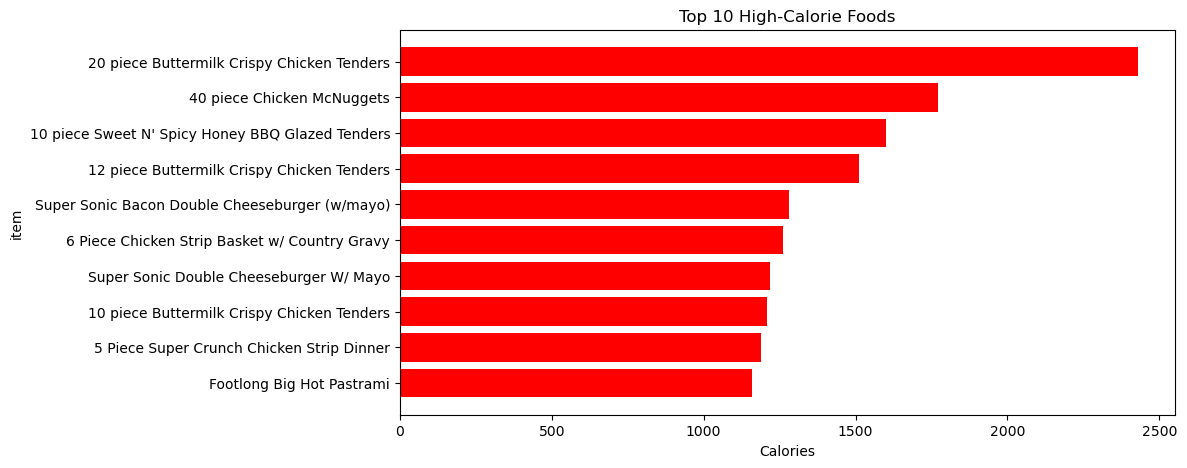

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Step 1: Load dataset properly
df = pd.read_csv("fastfood.csv")  # Update with actual filename

# 🔹 Step 2: Get Top 10 High-Calorie Foods
top_calories = df.nlargest(10, "calories", keep="first")

# 🔹 Step 3: Plot Bar Chart
plt.figure(figsize=(10, 5))
plt.barh(top_calories["item"], top_calories["calories"], color="red")
plt.xlabel("Calories")
plt.ylabel("item")
plt.title("Top 10 High-Calorie Foods")
plt.gca().invert_yaxis()  # Invert so highest is on top
plt.show()


### Scatter Plot which Helps identify protein-rich foods with low calories.

 


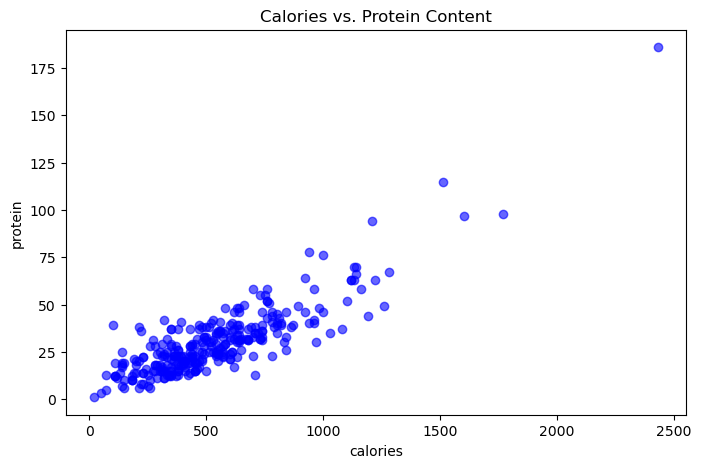

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(df["calories"], df["protein"], alpha=0.6, color="blue")
plt.xlabel("calories")
plt.ylabel("protein")
plt.title("Calories vs. Protein Content")
plt.show()

### Pie Chart: Proportion of Restaurants

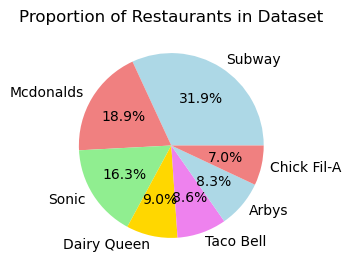

In [76]:
# Get restaurant counts
restaurant_counts = df['restaurant'].value_counts()

# Plot pie chart
plt.figure(figsize=(3, 3))
plt.pie(restaurant_counts, labels=restaurant_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title("Proportion of Restaurants in Dataset")
plt.show()

### Number of Menu Items Offered by Fast Food Restaurants with bar chart

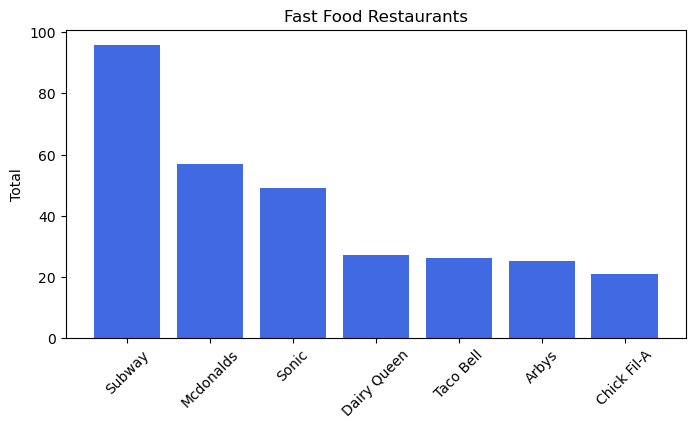

In [83]:
# Count the number of items per restaurant
restaurant_counts = df['restaurant'].value_counts()
# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(restaurant_counts.index, restaurant_counts.values, color='royalblue')
# Customize labels and title
plt.xlabel("")
plt.ylabel("Total")
plt.title("Fast Food Restaurants")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

###  Histogram: Distribution of Calories

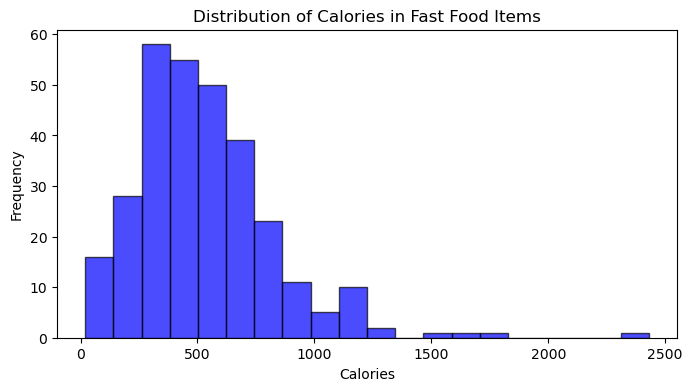

In [89]:
# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(df['calories'], bins=20, color="blue", edgecolor='black', alpha=0.7)
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Distribution of Calories in Fast Food Items")
plt.show()

### Scatter Plot: Calories vs. Total Fat

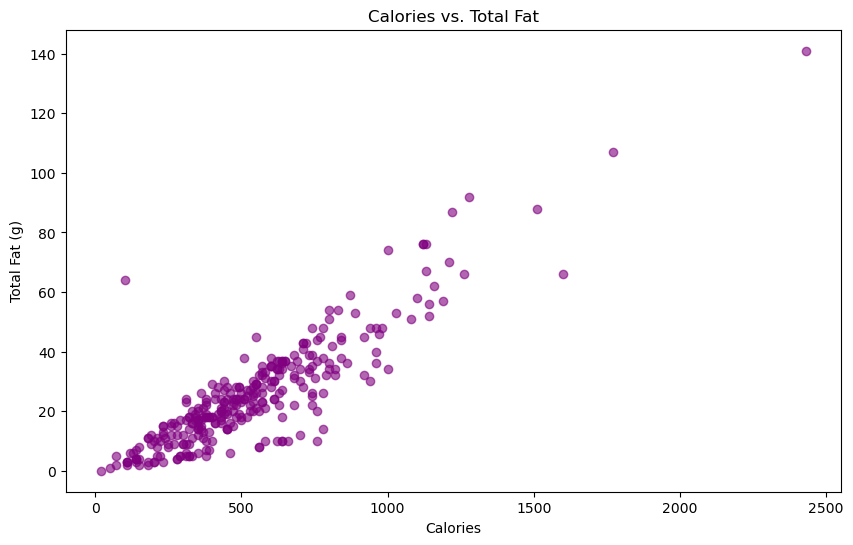

In [92]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['calories'], df['total_fat'], color="purple", alpha=0.6)
plt.xlabel("Calories")
plt.ylabel("Total Fat (g)")
plt.title("Calories vs. Total Fat")
plt.show()

### The ammount of sugar in food

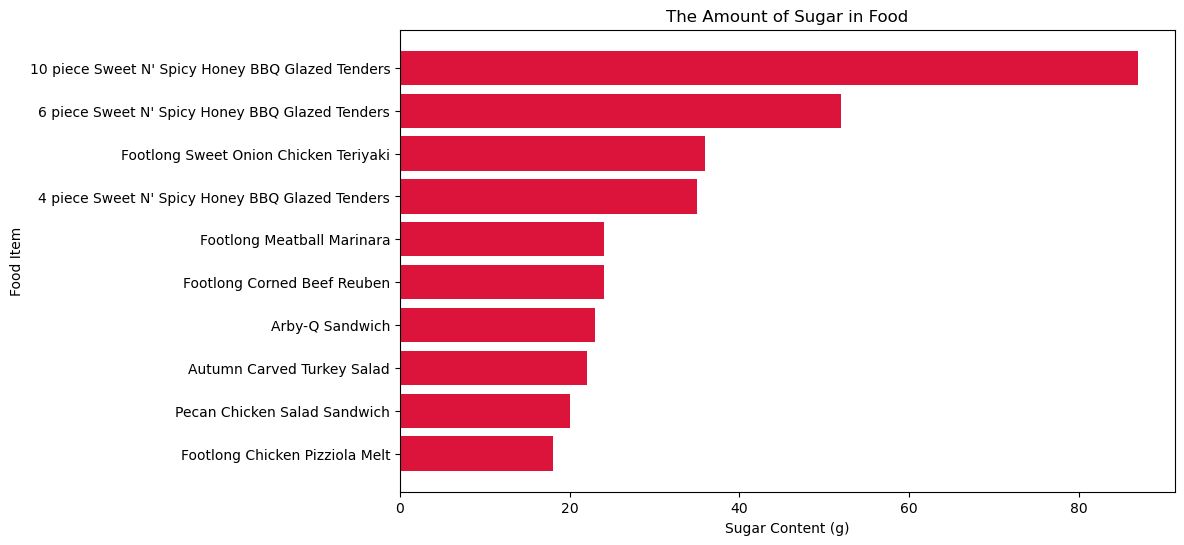

In [95]:

# Filter the dataset to relevant columns
df_ca = df[['item', 'sugar']].sort_values(by='sugar', ascending=False).head(10)  # Top 10 items with highest sugar

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_ca['item'], df_ca['sugar'], color='crimson')

# Customize labels and title
plt.xlabel("Sugar Content (g)")
plt.ylabel("Food Item")
plt.title("The Amount of Sugar in Food")

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Show the plot
plt.show()


### Distribution of carbohydrate content for each restaurant

C:\Users\Krish\AppData\Local\Temp\ipykernel_22076\360349847.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=restaurants, patch_artist=True, boxprops=dict(facecolor="lightblue"))


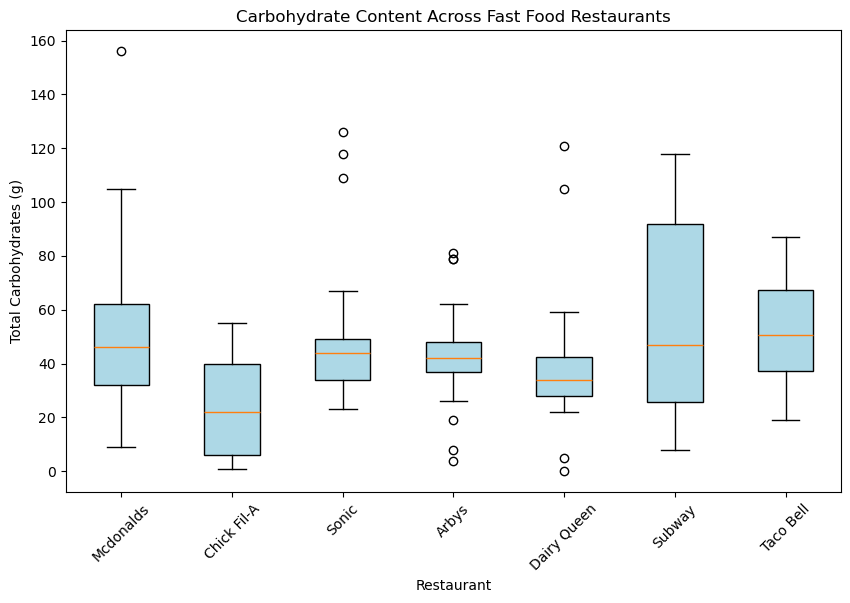

In [100]:
# Filter the dataset for relevant columns
df_ca = df[['restaurant', 'total_carb']]

# Get unique restaurant names
restaurants = df_ca['restaurant'].unique()

# Prepare data for box plot (group by restaurant)
data = [df_ca[df_ca['restaurant'] == restaurant]['total_carb'] for restaurant in restaurants]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=restaurants, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Customize labels and title
plt.xlabel("Restaurant")
plt.ylabel("Total Carbohydrates (g)")
plt.title("Carbohydrate Content Across Fast Food Restaurants")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### stacked area chart to show how different macronutrients (proteins, fats, and carbohydrates) contribute to the total calories across different restaurants

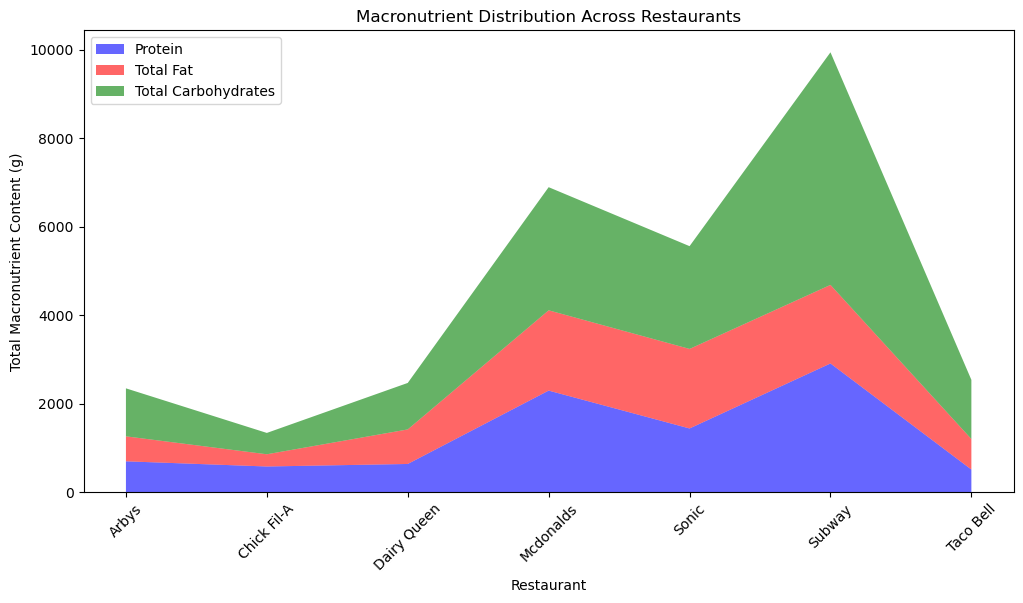

In [103]:

# Group data by restaurant and sum macronutrients
restaurant_grouped = df.groupby("restaurant")[["protein", "total_fat", "total_carb"]].sum()
# Create a stack plot
plt.figure(figsize=(12, 6))
plt.stackplot(
    restaurant_grouped.index,
    restaurant_grouped["protein"],
    restaurant_grouped["total_fat"],
    restaurant_grouped["total_carb"],
    labels=["Protein", "Total Fat", "Total Carbohydrates"],
    colors=["blue", "red", "green"],
    alpha=0.6
)

# Customize labels and title
plt.xlabel("Restaurant")
plt.ylabel("Total Macronutrient Content (g)")
plt.title("Macronutrient Distribution Across Restaurants")
plt.legend(loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
